In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv("aug_train.csv")
df_test = pd.read_csv("aug_test.csv")

## 1. Data Profilling

In [3]:
ProfileReport(df_train)

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
ProfileReport(df_test)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 2. Data Wrangling


In [5]:
train = df_train.copy() 
test = df_test.copy()

train['last_new_job'] = train['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) #just reads nicer
train['enrolled_university'][train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer
train['company_size'] = train['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) #diff replacement method

train['experience'] = train['experience'].apply(lambda x: '0' if x == '<1' else x)
train['experience'] = train['experience'].apply(lambda x: '20' if x == '>20' else x)

train['company_size'].fillna('0',inplace=True)
train['company_type'].fillna('Unknown',inplace=True)
train['major_discipline'].fillna('Unknown',inplace=True)

# Repeat on Test data

test['last_new_job'] = test['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) #just reads nicer
test['enrolled_university'][test['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer
test['company_size'] = test['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) #diff replacement method

test['experience'] = test['experience'].apply(lambda x: '0' if x == '<1' else x)
test['experience'] = test['experience'].apply(lambda x: '20' if x == '>20' else x)

test['company_size'].fillna('0',inplace=True)
test['company_type'].fillna('Unknown',inplace=True)
test['major_discipline'].fillna('Unknown',inplace=True)



In [6]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [7]:
train['experience'] = train['experience'].astype(str).astype(int)
test['experience'] = test['experience'].astype(str).astype(int)

train['target'] = train['target'].astype(float).astype(int)
train['target'] = train['target'].apply(lambda x: 'Job Seekers' if x == 1 else x)
train['target'] = train['target'].apply(lambda x: 'Non Job Seekers' if x == 0 else x)

train['training_hours'] = train['training_hours'].astype(str).astype(int)
test['training_hours'] = test['training_hours'].astype(str).astype(int)

In [8]:
ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['No Enrollment','Part time course','Full time course']
disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major']
exp_yrs_order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
exp_yrs_order_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['Never', '1', '2', '3', '4', '>4']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other']
company_order = ['Pvt Ltd','Unknown','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']

In [9]:
train.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
4          666  city_162                   0.767   Male   
6        28806  city_160                   0.920   Male   
7          402   city_46                   0.762   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       No Enrollment        Graduate   
1   No relevent experience       No Enrollment        Graduate   
4  Has relevent experience       No Enrollment         Masters   
6  Has relevent experience       No Enrollment     High School   
7  Has relevent experience       No Enrollment        Graduate   

  major_discipline  experience company_size    company_type last_new_job  \
0             STEM          20            0         Unknown            1   
1             STEM          15        50-99         Pvt Ltd           >4   
4             STEM          20        50-99  Funded Startup            4   
6          Unknown           5        50-99  Funded Startup            1   
7             STEM          13          <10         Pvt Ltd           >4   

   training_hours           target  
0              36      Job Seekers  
1              47  Non Job Seekers  
4               8  Non Job Seekers  
6              24  Non Job Seekers  
7              18      Job Seekers

## 3. Data Visualization

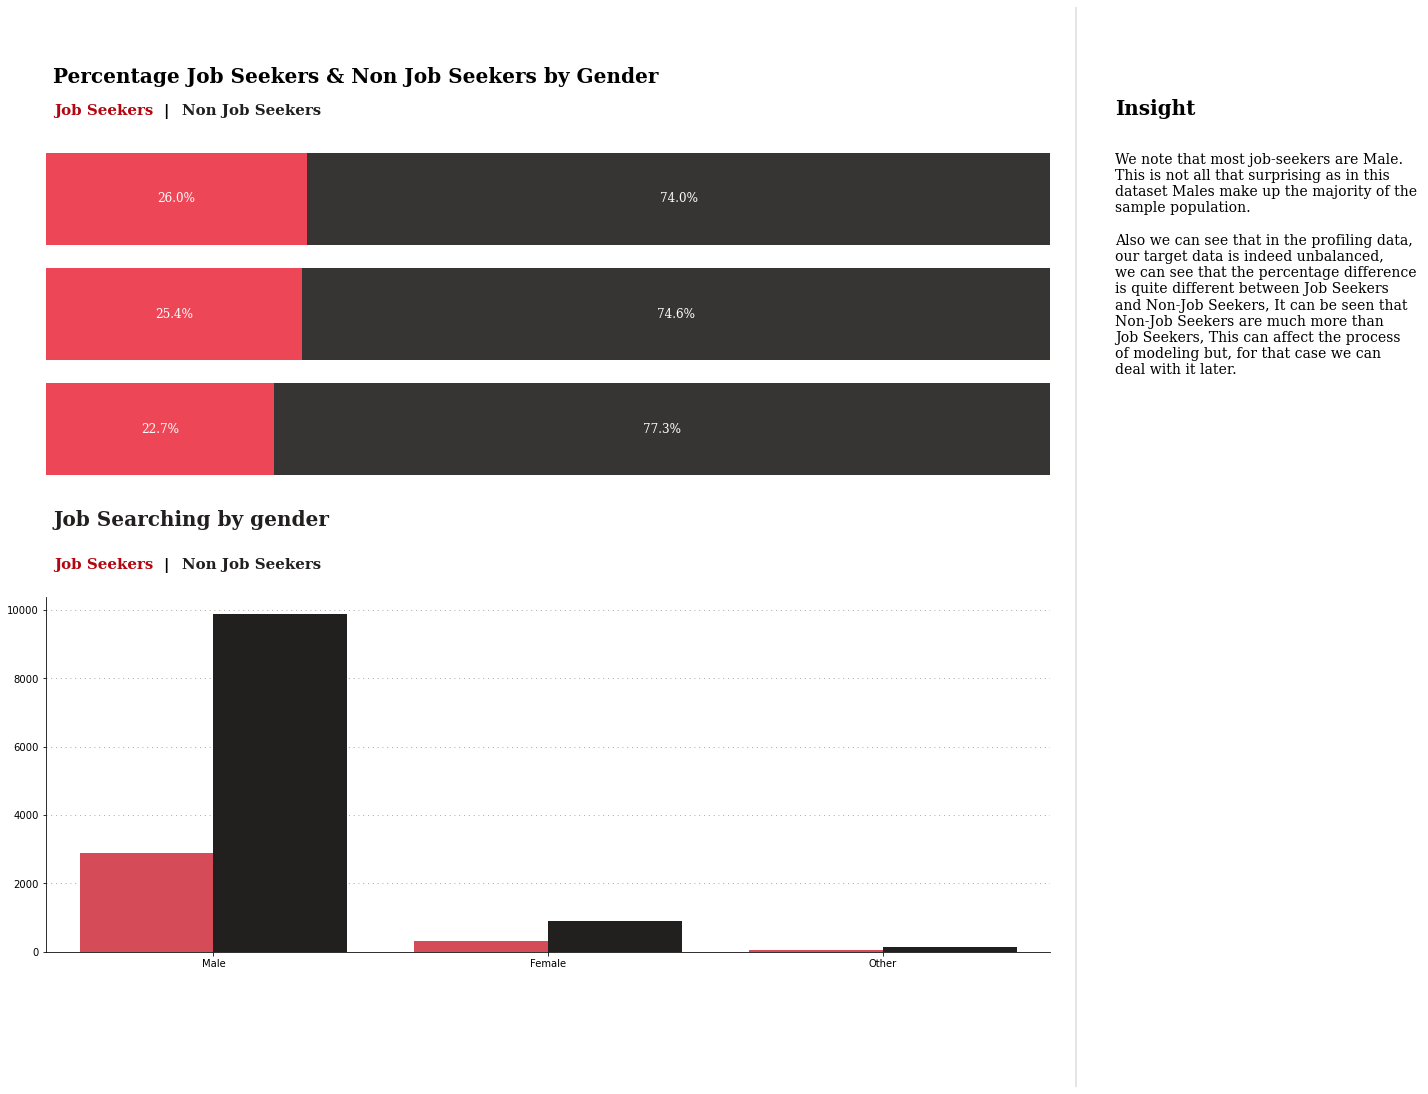

In [10]:
job_order = train['gender'].value_counts().index
data_group = train[['target','gender']].groupby('gender')['target'].value_counts().unstack().loc[job_order]
data_group['sum'] = data_group.sum(axis=1)
data_group_ratio = (data_group.T / data_group['sum']).T[['Job Seekers', 'Non Job Seekers']].sort_values(by='Job Seekers',ascending=False)[::-1]


# fig, ax = plt.subplots(1,1,figsize=(15,8),)

fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=0.3)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax0.axis('off')
# ax1.axis('off')


ax0.barh(data_group_ratio.index, data_group_ratio['Job Seekers'],
        color = '#ec3445', alpha=0.9, label='Job Seekers')
ax0.barh(data_group_ratio.index, data_group_ratio['Non Job Seekers'], left=data_group_ratio['Job Seekers'],
        color = '#221f1f', alpha=0.9, label='Non Job Seekers')

ax0.set_xlim(0, 1)
ax0.set_xticks([])
ax0.set_yticklabels(data_group_ratio.index, fontfamily='serif', fontsize=11)

# Percentage by gender 
for i in data_group_ratio.index:
    ax0.annotate(f"{data_group_ratio['Job Seekers'][i]*100:.3}%", 
                   xy=(data_group_ratio['Job Seekers'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_group_ratio.index:
    ax0.annotate(f"{data_group_ratio['Non Job Seekers'][i]*100:.3}%", 
                   xy=(data_group_ratio['Job Seekers'][i]+data_group_ratio['Non Job Seekers'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
  
fig.text(0.13, 0.93, 'Percentage Job Seekers & Non Job Seekers by Gender', fontsize=20, fontweight='bold', fontfamily='serif')   
   

for s in ['top', 'left', 'right', 'bottom']:
    ax0.spines[s].set_visible(False)
     

ax0.tick_params(axis='both', which='major', labelsize=12)
ax0.tick_params(axis=u'both', which=u'both',length=0)
    
# ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.131,0.90,"Job Seekers", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.215,0.90,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.230,0.90,"Non Job Seekers", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


color_palette = ['#ec3445','#221f1f']

fig.text(0.131,0.52,"Job Searching by gender",fontweight="bold", fontfamily = 'serif', fontsize = 20, color='#221f1f')
fig.text(0.131,0.48,"Job Seekers", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.215,0.48,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.230,0.48,"Non Job Seekers", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')



ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(x="gender", hue="target", data=train, palette=color_palette, ax=ax1, zorder=3)
ax1.legend().remove()
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# legend_labels, _= ax1.get_legend_handles_labels()
# ax1.legend(legend_labels, ["Non-Job Seeker", "Job Seeker"], ncol=2, bbox_to_anchor=(-0.52, 1.28), 
#            facecolor=background_color, edgecolor=background_color)
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.text(0.95, 0.90, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')


fig.text(0.95, 0.60, '''
We note that most job-seekers are Male.
This is not all that surprising as in this
dataset Males make up the majority of the
sample population.

Also we can see that in the profiling data, 
our target data is indeed unbalanced, 
we can see that the percentage difference 
is quite different between Job Seekers 
and Non-Job Seekers, It can be seen that 
Non-Job Seekers are much more than 
Job Seekers, This can affect the process 
of modeling but, for that case we can
deal with it later.



'''
         , fontsize=14, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([0.92, 0.92], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])






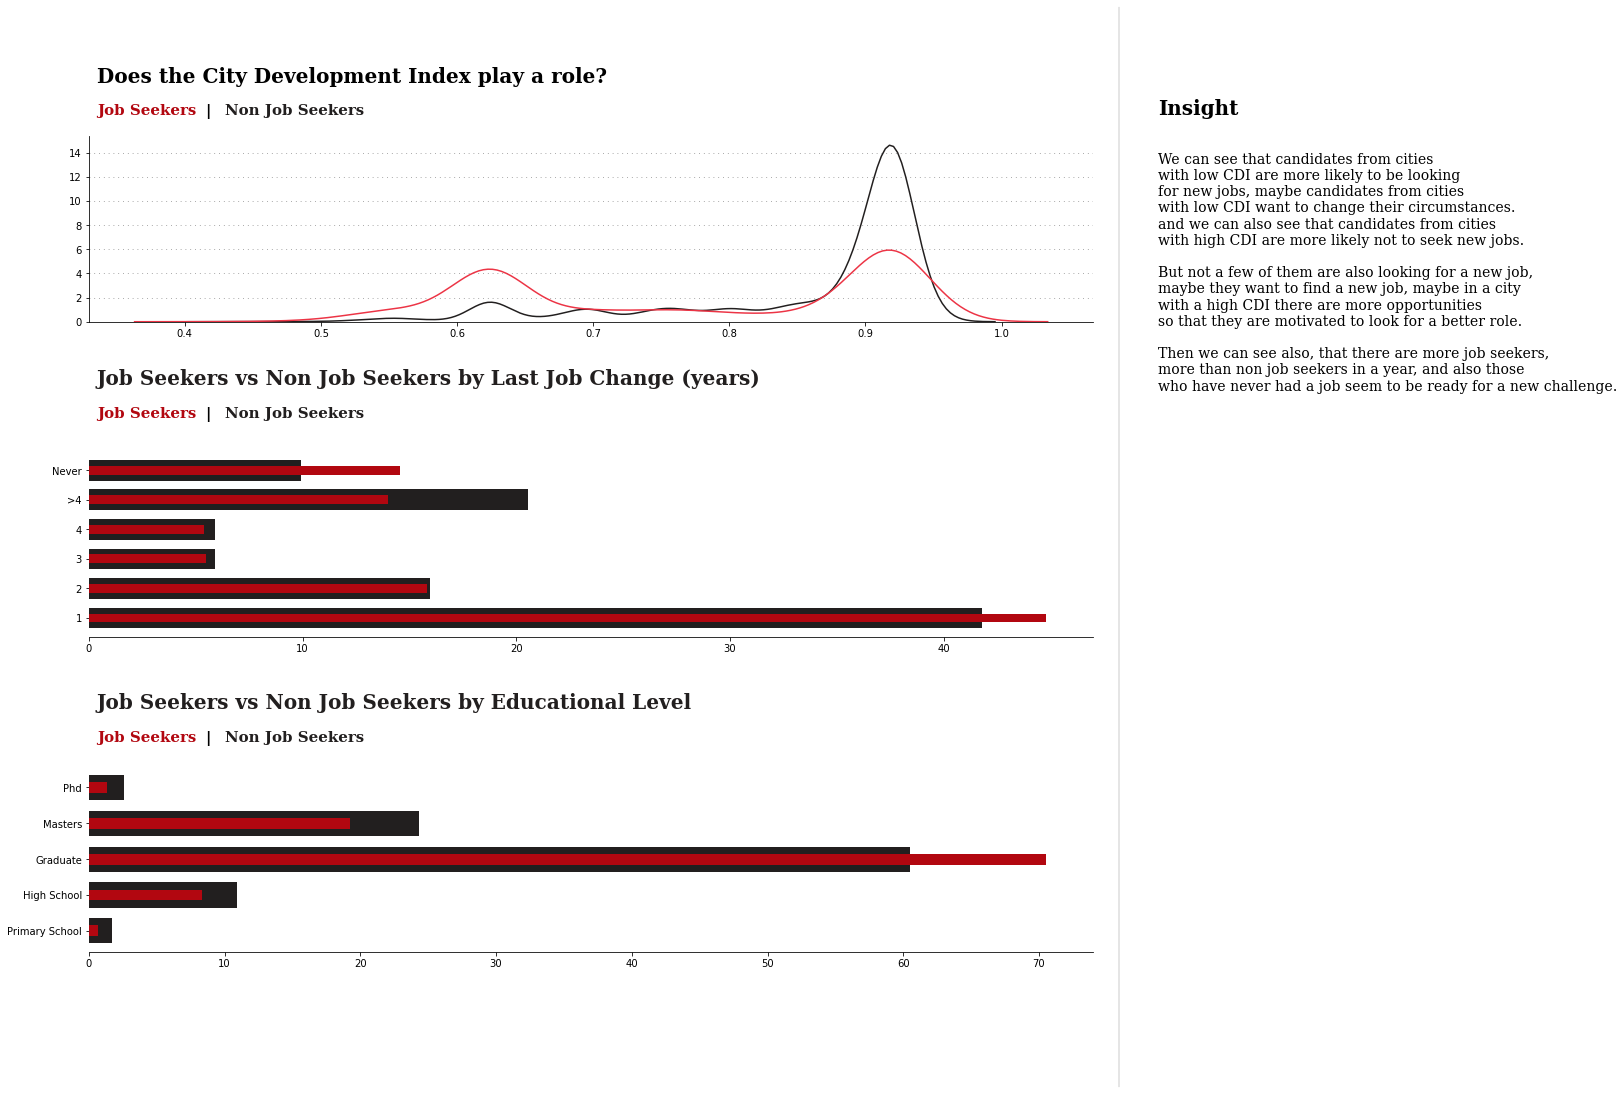

In [11]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3, 1)
gs.update(wspace=0.1, hspace=0.7)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])


fig.text(0.131,0.93, 'Does the City Development Index play a role?', fontsize=20, fontweight='bold', fontfamily='serif')   
fig.text(0.131,0.90,"Job Seekers", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.215,0.90,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.230,0.90,"Non Job Seekers", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

fig.text(0.131,0.65,"Job Seekers vs Non Job Seekers by Last Job Change (years)",fontweight="bold", fontfamily = 'serif', fontsize = 20, color='#221f1f')
fig.text(0.131,0.62,"Job Seekers", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.215,0.62,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.230,0.62,"Non Job Seekers", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

fig.text(0.131,0.35,"Job Seekers vs Non Job Seekers by Educational Level",fontweight="bold", fontfamily = 'serif', fontsize = 20, color='#221f1f')
fig.text(0.131,0.32,"Job Seekers", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.215,0.32,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.230,0.32,"Non Job Seekers", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')



ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(train.loc[(train["target"]=='Non Job Seekers'), "city_development_index"], color="#221f1f", label="Not Survived", ax=ax0)
sns.kdeplot(train.loc[(train["target"]=='Job Seekers'), "city_development_index"], color="#ec3445", label="Survived", ax=ax0)
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)

train['count'] = 1
job_seek = train[train['target'] == 'Job Seekers']
non_job_seek = train[train['target'] == 'Non Job Seekers']

## Percentage target & last_new_job(years)

not_seek = non_job_seek.groupby(['target','last_new_job'])['count'].sum().unstack().T
seek_job = job_seek.groupby(['target','last_new_job'])['count'].sum().unstack().T

not_seek.columns = ['count']
seek_job.columns = ['count']

not_seek["percentage"] = not_seek["count"].apply(lambda x: x/sum(not_seek["count"]))*100
seek_job["percentage"] = seek_job["count"].apply(lambda x: x/sum(seek_job["count"]))*100

ax1.barh(not_seek.index, not_seek["percentage"], color='#221f1f', zorder=3, height = 0.7)
ax1.barh(seek_job.index, seek_job["percentage"], color='#b20710', zorder=3, height = 0.3)
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)

ed_notseek = non_job_seek.groupby(['target','education_level'])['count'].sum().unstack().T.loc[ed_order]
ed_seek = job_seek.groupby(['target','education_level'])['count'].sum().unstack().T.loc[ed_order]

ed_notseek.columns = ['count']
ed_seek.columns = ['count']

ed_notseek["percentage"] = ed_notseek["count"].apply(lambda x: x/sum(ed_notseek["count"]))*100
ed_seek["percentage"] = ed_seek["count"].apply(lambda x: x/sum(ed_seek["count"]))*100

ax2.barh(ed_notseek.index, ed_notseek["percentage"], color='#221f1f', zorder=3, height = 0.7)
ax2.barh(ed_seek.index, ed_seek["percentage"], color='#b20710', zorder=3, height = 0.3)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)

fig.text(0.95, 0.90, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')


fig.text(0.95, 0.60, '''
We can see that candidates from cities 
with low CDI are more likely to be looking 
for new jobs, maybe candidates from cities 
with low CDI want to change their circumstances. 
and we can also see that candidates from cities 
with high CDI are more likely not to seek new jobs.

But not a few of them are also looking for a new job, 
maybe they want to find a new job, maybe in a city 
with a high CDI there are more opportunities 
so that they are motivated to look for a better role. 

Then we can see also, that there are more job seekers, 
more than non job seekers in a year, and also those 
who have never had a job seem to be ready for a new challenge.


'''
         , fontsize=14, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([0.92, 0.92], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])







Text(0, -0.4, 'We can also look at candidates with low experience in both small and large companies.')

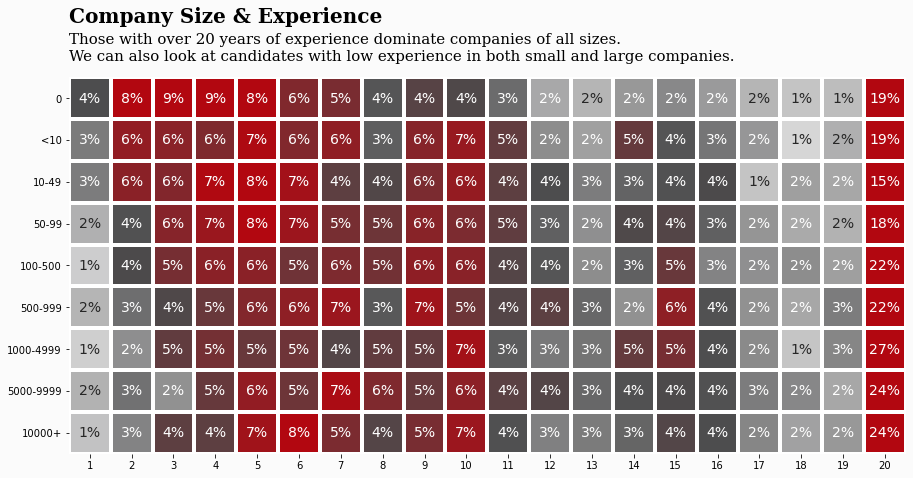

In [12]:
cross_city = pd.crosstab(train['company_size'], train['experience'], normalize = 'index').loc[size_order,exp_yrs_order_2]
fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,1)
gs.update(wspace=0.1, hspace=0.3)
ax0 = fig.add_subplot(gs[:,:])

colors = ["#fbfbfb", "#4b4b4c","#b20710"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("",colors)

sns.heatmap(ax=ax0, data=cross_city, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})


background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)

ax0.set_xlabel("")
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)


ax0.text(0,-1.3,
        "Company Size & Experience",
        fontsize = 20,
        fontweight='bold',
        fontfamily='serif')
ax0.text(0,-0.8,
        "Those with over 20 years of experience dominate companies of all sizes.",
        fontsize = 15,
        fontfamily='serif')
ax0.text(0,-0.4,
        "We can also look at candidates with low experience in both small and large companies.",
        fontsize = 15,
        fontfamily='serif')



Text(0, -0.1, 'are less likely to seek job.')

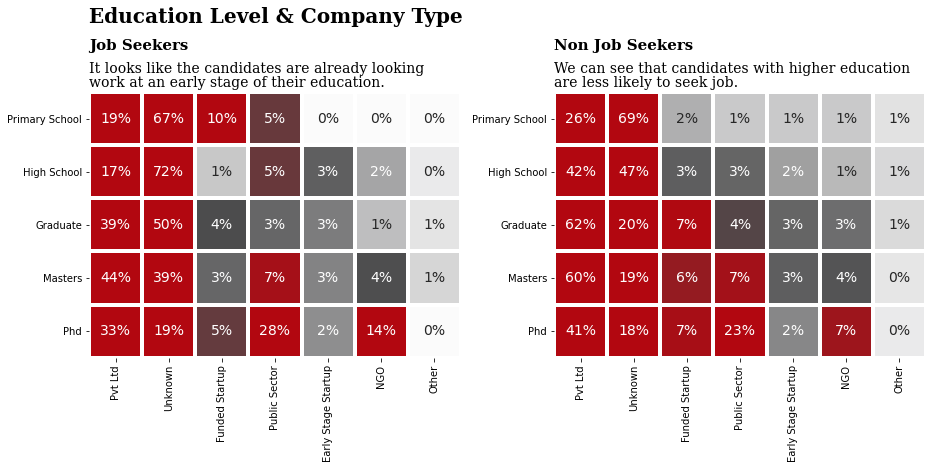

In [13]:
job_seek_only = train[train["target"] == "Job Seekers"]
non_job_seek_only = train[train["target"] == "Non Job Seekers"]
job_seek_cross = pd.crosstab(job_seek_only["education_level"], job_seek_only["company_type"], normalize='index').loc[ed_order,company_order]
non_job_seek_cross = pd.crosstab(non_job_seek_only["education_level"], non_job_seek_only["company_type"],normalize='index').loc[ed_order,company_order]

fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.25, hspace=0.10)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

colors = ["#fbfbfb", "#4b4b4c","#b20710"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("",colors)

sns.heatmap(ax=ax0, data=job_seek_cross, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})

sns.heatmap(ax=ax1, data=non_job_seek_cross, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})

ax0.set_xlabel("")
ax0.set_ylabel("")
ax1.set_xlabel("")
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)



ax0.text(0,-1.3,
        "Education Level & Company Type",
        fontsize = 20,
        fontweight='bold',
        fontfamily='serif')


ax0.text(0,-0.8,
        "Job Seekers",
        fontsize = 15,
        fontweight='bold',
        fontfamily='serif')

ax0.text(0,-0.36,
        "It looks like the candidates are already looking",
        fontsize = 14,
        fontweight='light',
        fontfamily='serif')


ax0.text(0,-0.10,
        "work at an early stage of their education.",
        fontsize = 14,
        fontweight='light',
        fontfamily='serif')






ax1.text(0,-0.8,
        "Non Job Seekers",
        fontsize = 15,
        fontweight='bold',
        fontfamily='serif')
ax1.text(0,-0.36,
        "We can see that candidates with higher education",
        fontsize = 14,
        fontweight='light',
        fontfamily='serif')


ax1.text(0,-0.10,
        "are less likely to seek job.",
        fontsize = 14,
        fontweight='light',
        fontfamily='serif')






Text(0, -0.35, 'People with 20+ years of experience are not seeking new roles perhaps they are at their desired seniority level.')

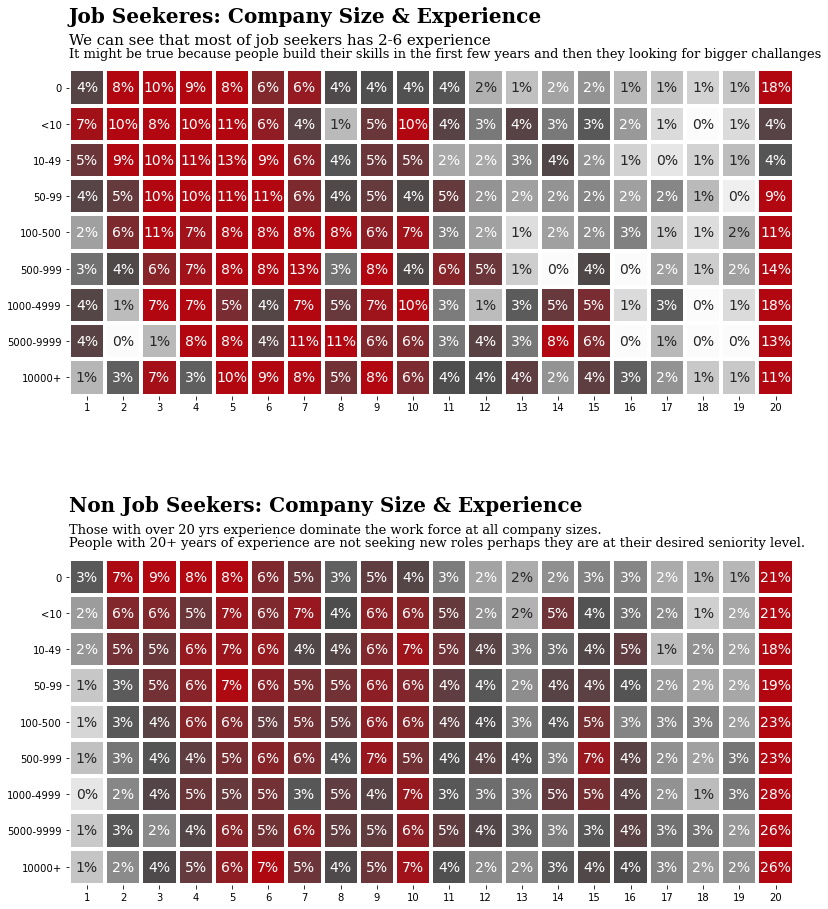

In [14]:
job_seek_only = train[train["target"] == "Job Seekers"]
non_job_seek_only = train[train["target"] == "Non Job Seekers"]
job_seek_cross = pd.crosstab(job_seek_only["company_size"], job_seek_only["experience"], normalize='index').loc[size_order,exp_yrs_order_2]
non_job_seek_cross = pd.crosstab(non_job_seek_only["company_size"], non_job_seek_only["experience"],normalize='index').loc[size_order,exp_yrs_order_2]

fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])

colors = ["#fbfbfb", "#4b4b4c","#b20710"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("",colors)

sns.heatmap(ax=ax0, data=job_seek_cross, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})

sns.heatmap(ax=ax1, data=non_job_seek_cross, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})

ax0.set_xlabel("")
ax0.set_ylabel("")
ax1.set_xlabel("")
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)



ax0.text(0,-1.3,
        "Job Seekeres: Company Size & Experience ",
        fontsize = 20,
        fontweight='bold',
        fontfamily='serif')


ax0.text(0,-0.7,
        "We can see that most of job seekers has 2-6 experience",
        fontsize = 15,
        fontweight='light',
        fontfamily='serif')

ax0.text(0, -0.35, 
         'It might be true because people build their skills in the first few years and then they looking for bigger challanges',
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )


ax1.text(0,-1.3,
        "Non Job Seekers: Company Size & Experience",
        fontsize = 20,
        fontweight='bold',
        fontfamily='serif')

ax1.text(0, -0.7, 
         'Those with over 20 yrs experience dominate the work force at all company sizes.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
ax1.text(0, -0.35, 
         'People with 20+ years of experience are not seeking new roles perhaps they are at their desired seniority level.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )


## 4. Modelling
We note that our data has unbalanced data target, to deal with this problem, we can simply use oversampling method using SMOTE

In [15]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,recall_score, precision_score, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, make_scorer
import warnings
warnings.filterwarnings('ignore')

In [16]:
df_train.isna().sum()/len(df_train)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [17]:
# Data Preparation
df_train['experience'] = df_train['experience'].apply(lambda x: '0' if x == '<1' else x)
df_train['experience'] = df_train['experience'].apply(lambda x: '20' if x == '>20' else x)
df_train['company_size'].fillna('0',inplace=True)
df_train['company_type'].fillna('Unknown',inplace=True)
df_train['major_discipline'].fillna('Unknown',inplace=True)

In [18]:
df_train.dropna(axis= 0, inplace=True)
df_train.isna().sum()/len(df_train)

enrollee_id               0.0
city                      0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
dtype: float64

In [19]:
df_train.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
4          666  city_162                   0.767   Male   
6        28806  city_160                   0.920   Male   
7          402   city_46                   0.762   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment         Masters   
6  Has relevent experience       no_enrollment     High School   
7  Has relevent experience       no_enrollment        Graduate   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM         20            0         Unknown            1   
1             STEM         15        50-99         Pvt Ltd           >4   
4             STEM         20        50-99  Funded Startup            4   
6          Unknown          5        50-99  Funded Startup            1   
7             STEM         13          <10         Pvt Ltd           >4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
4               8     0.0  
6              24     0.0  
7              18     1.0

In [20]:
## Feature Engineering
column_dummies = ['city','gender','relevent_experience','enrolled_university','education_level',
                 'major_discipline','experience','company_size','company_type','last_new_job']
train_dummies = []

for col in column_dummies:
    dummies = pd.get_dummies(df_train[col])
    train_dummies.append(dummies)
    
column_dummies.append('enrollee_id')
train_dummies.insert(0, df_train.drop(columns=column_dummies))

df_train = pd.concat(train_dummies, axis=1)
df_train.head()

city_development_index  training_hours  target  city_1  city_10  city_100  \
0                   0.920              36     1.0       0        0         0   
1                   0.776              47     0.0       0        0         0   
4                   0.767               8     0.0       0        0         0   
6                   0.920              24     0.0       0        0         0   
7                   0.762              18     1.0       0        0         0   

   city_101  city_102  city_103  city_104  ...  Other  Public Sector  Pvt Ltd  \
0         0         0         1         0  ...      0              0        0   
1         0         0         0         0  ...      0              0        1   
4         0         0         0         0  ...      0              0        0   
6         0         0         0         0  ...      0              0        0   
7         0         0         0         0  ...      0              0        1   

   Unknown  1  2  3  4  >4  never  
0        1  1  0  0  0   0      0  
1        0  0  0  0  0   1      0  
4        0  0  0  0  1   0      0  
6        0  1  0  0  0   0      0  
7        0  0  0  0  0   1      0  

[5 rows x 187 columns]

In [21]:
# split dataset and oversampling

features = df_train.drop(columns = ['target']).values
target = df_train['target'].values
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size = 0.3, random_state = 101)

sm = SMOTE(random_state = 101)
X_sm, y_sm = sm.fit_resample(X_train, y_train.ravel())

In [22]:
X_train

array([[  0.878,  36.   ,   0.   , ...,   0.   ,   1.   ,   0.   ],
       [  0.926,  54.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
       [  0.92 ,  35.   ,   0.   , ...,   0.   ,   1.   ,   0.   ],
       ...,
       [  0.624, 222.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
       [  0.925, 112.   ,   0.   , ...,   1.   ,   0.   ,   0.   ],
       [  0.776,  61.   ,   0.   , ...,   0.   ,   0.   ,   0.   ]])

In [23]:
def score_algorithm(model):
    clf = model()
    # Fitting
    clf.fit(X_sm, y_sm)
    # Evaluating Train Data
    prediction_train = clf.predict(X_sm)
    precision_train = precision_score(y_sm, prediction_train)
    recall_train = precision_score(y_sm, prediction_train)
    accuracy_train = accuracy_score(y_sm, prediction_train)

    # Evaluating Test Data
    prediction_test = clf.predict(X_test)
    precision_test = precision_score(y_test, prediction_test)
    recall_test = recall_score(y_test, prediction_test)
    accuracy_test = accuracy_score(y_test, prediction_test)

    all_score = [precision_train,  recall_train, accuracy_train, precision_test, recall_test, accuracy_test]
    return all_score

In [24]:
algorithm = [LogisticRegression,SVC,KNeighborsClassifier,MLPClassifier,
             GradientBoostingClassifier, RandomForestClassifier,XGBClassifier,GaussianNB]
all_score = []
for item in algorithm:
    score = score_algorithm(item)
    all_score.append(score)

[16:18:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:
df_score = pd.DataFrame(all_score, index = ['LogisticRegression','SVC','KNeighborsClassifier','MLPClassifier',
             'GradientBoostingClassifier', 'RandomForestClassifier','XGBClassifier','GaussianNB'])
df_score = df_score.rename(columns={0:'precision_train',1:'recall_train',2:'accuracy_train',3:'precision_test',
                        4:'recall_test',5:'accuracy_test'})
df_score

precision_train  recall_train  accuracy_train  \
LogisticRegression                 0.794234      0.794234        0.791002   
SVC                                0.729766      0.729766        0.657795   
KNeighborsClassifier               0.714570      0.714570        0.796626   
MLPClassifier                      0.948883      0.948883        0.954813   
GradientBoostingClassifier         0.872646      0.872646        0.872744   
RandomForestClassifier             0.999215      0.999215        0.999019   
XGBClassifier                      0.936445      0.936445        0.919435   
GaussianNB                         0.585123      0.585123        0.632161   

                            precision_test  recall_test  accuracy_test  
LogisticRegression                0.517141        0.709       0.775553  
SVC                               0.437323        0.464       0.733161  
KNeighborsClassifier              0.307660        0.743       0.545690  
MLPClassifier                     0.489627        0.472       0.759774  
GradientBoostingClassifier        0.582192        0.595       0.804051  
RandomForestClassifier            0.562420        0.437       0.787329  
XGBClassifier                     0.578750        0.463       0.794159  
GaussianNB                        0.278141        0.808       0.460904

Base on recall score, top 3 model is:

1. Logistic Regression
2. KNeighbors Classifier
3. GaussianNB

This top 3 model will be use to next step are hyperparameter tuning.

## 5. Hyperparameter Tuning For Logistic Regression

In [26]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none','l1','l2','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator = model, param_grid=grid, n_jobs = 1, cv=cv, scoring = 'recall', error_score = 0)
grid_result = grid_search.fit(X_sm,y_sm)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.789433 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.789302 (0.017422) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.780670 (0.018196) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.789171 (0.017520) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.789171 (0.017520) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.781978 (0.019412) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.789171 (0.017520) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'li

## 6. KNN Classifier Hyperparameter Tuning

In [27]:
model2 = KNeighborsClassifier()
leaf_size = list(range(1,15))
n_neighbors = list(range(1,10))
p = [1,2]
grid = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p=p)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator = model2, param_grid=grid, n_jobs = 1, cv=cv, scoring = 'recall', error_score = 0)
grid_result = grid_search.fit(X_sm,y_sm)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.987444 using {'leaf_size': 1, 'n_neighbors': 1, 'p': 2}
0.975761 (0.006076) with: {'leaf_size': 1, 'n_neighbors': 1, 'p': 1}
0.987444 (0.004526) with: {'leaf_size': 1, 'n_neighbors': 1, 'p': 2}
0.915688 (0.010249) with: {'leaf_size': 1, 'n_neighbors': 2, 'p': 1}
0.953309 (0.008726) with: {'leaf_size': 1, 'n_neighbors': 2, 'p': 2}
0.954836 (0.007400) with: {'leaf_size': 1, 'n_neighbors': 3, 'p': 1}
0.976589 (0.006552) with: {'leaf_size': 1, 'n_neighbors': 3, 'p': 2}
0.900864 (0.010889) with: {'leaf_size': 1, 'n_neighbors': 4, 'p': 1}
0.945201 (0.007525) with: {'leaf_size': 1, 'n_neighbors': 4, 'p': 2}
0.930116 (0.008795) with: {'leaf_size': 1, 'n_neighbors': 5, 'p': 1}
0.966258 (0.007304) with: {'leaf_size': 1, 'n_neighbors': 5, 'p': 2}
0.883251 (0.011947) with: {'leaf_size': 1, 'n_neighbors': 6, 'p': 1}
0.938661 (0.009005) with: {'leaf_size': 1, 'n_neighbors': 6, 'p': 2}
0.913812 (0.009422) with: {'leaf_size': 1, 'n_neighbors': 7, 'p': 1}
0.958104 (0.006205) with: {'leaf_size':

## 7. Gaussian Naive Bayes Hyperparameter Tuning

In [29]:
import numpy as np
model3 = GaussianNB()
grid = {'var_smoothing': np.logspace(0,-9, num=100)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator= model3, param_grid=grid, n_jobs = 1, cv=cv, scoring = 'recall', error_score = 0)
grid_result = grid_search.fit(X_sm,y_sm)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.954008 using {'var_smoothing': 5.3366992312063123e-05}
0.875709 (0.011777) with: {'var_smoothing': 1.0}
0.873573 (0.012348) with: {'var_smoothing': 0.8111308307896871}
0.869606 (0.013775) with: {'var_smoothing': 0.657933224657568}
0.867121 (0.013872) with: {'var_smoothing': 0.533669923120631}
0.863154 (0.014733) with: {'var_smoothing': 0.43287612810830584}
0.859797 (0.015271) with: {'var_smoothing': 0.3511191734215131}
0.856091 (0.016175) with: {'var_smoothing': 0.2848035868435802}
0.853475 (0.016191) with: {'var_smoothing': 0.23101297000831597}
0.851034 (0.016061) with: {'var_smoothing': 0.1873817422860384}
0.849377 (0.016184) with: {'var_smoothing': 0.15199110829529336}
0.848461 (0.016224) with: {'var_smoothing': 0.12328467394420659}
0.847982 (0.015896) with: {'var_smoothing': 0.1}
0.847895 (0.015725) with: {'var_smoothing': 0.08111308307896872}
0.848156 (0.016035) with: {'var_smoothing': 0.0657933224657568}
0.848723 (0.016166) with: {'var_smoothing': 0.0533669923120631}
0.84

## 8. Final Result

In [30]:
lr_grid = LogisticRegression(C= 1.0, penalty = 'l2', solver= 'liblinear')
lr_grid.fit(X_sm,y_sm)
lr_grid_pred = lr_grid.predict(X_test)
print(classification_report(y_test, lr_grid_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85      3246
         1.0       0.52      0.71      0.60      1000

    accuracy                           0.78      4246
   macro avg       0.71      0.75      0.72      4246
weighted avg       0.81      0.78      0.79      4246



In [31]:
knn_grid = KNeighborsClassifier(leaf_size= 1, n_neighbors= 1, p= 2)
knn_grid.fit(X_sm, y_sm)
knn_grid_pred = knn_grid.predict(X_test)
print(classification_report(y_test, knn_grid_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.64      0.72      3246
         1.0       0.32      0.56      0.41      1000

    accuracy                           0.62      4246
   macro avg       0.57      0.60      0.56      4246
weighted avg       0.71      0.62      0.65      4246



In [33]:
gnb_grid = GaussianNB(var_smoothing = 5.3366992312063123e-05)
gnb_grid.fit(X_sm, y_sm)
gnb_grid_pred = gnb_grid.predict(X_test)
print(classification_report(y_test, gnb_grid_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.29      0.44      3246
         1.0       0.29      0.92      0.44      1000

    accuracy                           0.44      4246
   macro avg       0.60      0.61      0.44      4246
weighted avg       0.77      0.44      0.44      4246

